<a href="https://colab.research.google.com/github/stebechoi/CP2/blob/Hwkdir/CP2_eda~CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 로드

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')
# 작업 디렉토리 변경 change directory
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/CP/CP2')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 현재 작업중인 위치 current working directory
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/CP/CP2'

In [ ]:
ls

'AIB_16기_K팀_01주차_공유사항[오혜진, 최영조].gdoc'   ml-100k/
 CP2.ipynb                                            movielense-100k.zip


In [ ]:
# !unzip 'movielense-100k'

Archive:  movielense-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/mku.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u.genre? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u.info? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u.item? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u.occupation? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u.user? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u1.base? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u1.test? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u2.base? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ml-100k/u2.test? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### 파일 확인
- readme.text 확인하여 각 컬럼명 할당
1. u.data / 유저별 영화평점
2. u.item / 영화 정보
3. u.info / 고객 수, 영화 수, 평점 수
4. u.genres / 장르목록
5. u.user / id, 나이, 성별, 직업, 우편번호
6. u.occupation / 직업목록

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 01. u.data 파일. 각 유저별 각 영화평점
columns=['user id', 'item id', 'rating', 'timestamp'] 
data=pd.read_csv('ml-100k/u.data', sep='\t', names=columns)
# 타임스탬프 변환
from datetime import datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s') #Thanks to RecSys02 # unit='s'의 의미? (s=second 초단위/ D,s,ms,us,ns)

# 02. u.item 파일. 영화정보(출시일, 이미지url(IMDB), 장르 원핫인코딩) 
column_names = ['movie id', 'movie title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 
              "Children's", "Comedy", 'Crime', 'Documentary', 'Drama', 'Fantasy', 
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western']
movies = pd.read_csv('ml-100k/u.item', encoding='latin-1', sep='\|', header=None, index_col=0, names=column_names ) # index_col=0, CF예시에서는 인덱스를 생략하고 movie id를 인덱스로 쓰는데, 그럴 경우 merge하면서 컬럼 불러오기가 안된다.

# 03. u.info 파일. 전체 유저 수, 전체 영화 수 , 전체 평점 수
info = pd.read_csv('ml-100k/u.info', header=None)

# 04. u.genre 파일. 장르의 이름과 id 매치
genre = pd.read_csv('ml-100k/u.genre', sep='|', names=['genre','g_id'])

# 05. u.user 파일. 평점자 정보(id, 나이, 성별, 직업, 우편번호)
column_names2 = ['user id', 'age', 'gender', 'occupation', 'zip code']
user=pd.read_csv('ml-100k/u.user', sep='|', names = column_names2)

# 06. u.occupation 파일. 직업과 숫자 매칭
occu=pd.read_csv('ml-100k/u.occupation', header=None, names=['occupations'])

<ipython-input-33-4445024c62ae>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('ml-100k/u.item', encoding='latin-1', sep='\|', header=None, index_col=0, names=column_names )


In [ ]:
print(data.head())
print('='*8)
print(movies.head())
print('='*8)
print(info)
print('='*8)
print(genre)
print('='*8)
print(user.head())
print('='*8)
print(occu)

   user id  item id  rating           timestamp
0      196      242       3 1997-12-04 15:55:49
1      186      302       3 1998-04-04 19:22:22
2       22      377       1 1997-11-07 07:18:36
3      244       51       2 1997-11-27 05:02:03
4      166      346       1 1998-02-02 05:33:16
                movie title release date  video release date  \
movie id                                                       
1          Toy Story (1995)  01-Jan-1995                 NaN   
2          GoldenEye (1995)  01-Jan-1995                 NaN   
3         Four Rooms (1995)  01-Jan-1995                 NaN   
4         Get Shorty (1995)  01-Jan-1995                 NaN   
5            Copycat (1995)  01-Jan-1995                 NaN   

                                                   IMDb URL  unknown  Action  \
movie id                                                                       
1         http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
2         http://us.imd

### 전처리

In [ ]:
# 평점 점수 범위 확인 및 이상한 점수 확인
data.rating.unique()

array([3, 1, 2, 4, 5])

In [ ]:
# data null값 확인, 없음
data.isna().sum()

user id      0
item id      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# movies null 값 확인
movies.isna().sum()

movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [ ]:
# release date 항목에서 null 값을 가진 한 개의 row 탐색
movies[movies['release date'].isna()]
# 영화제목도, 장르도 unknown. 제목이 unknown?, 아니면 missing값?

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
267,unknown,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# movie id가 267인 영화 rating 탐색
data[data['item id']==267]

,user id,item id,rating,timestamp
2172,130,267,5,1997-10-02 14:07:19
3781,5,267,4,1997-09-30 15:57:44
7245,268,267,3,1997-10-01 21:41:17
12475,297,267,3,1997-09-28 01:12:19
14756,319,267,4,1997-10-01 12:08:10
15292,1,267,4,1997-10-01 08:02:35
49295,532,267,3,1997-09-28 10:09:08
93523,833,267,1,1997-09-30 21:41:09
99723,422,267,4,1997-09-30 21:46:26


In [ ]:
# movie id 267 정보 삭제? or user-base 사용하되 혹시 추천되는 경우 block?

In [ ]:
# 1682개 전부가 null인 video release date 드롭
movies.drop(['video release date'], axis=1, inplace=True)

In [ ]:
movies.head()

,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.head()

,user id,item id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [ ]:
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [ ]:
df = pd.merge(movies, data, on='movie id')
df = df[['movie id', 'movie title', 'release date', 'user id', 'rating', 'timestamp']]
df

,movie id,movie title,release date,user id,rating,timestamp
0,1,Toy Story (1995),01-Jan-1995,308,4,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,287,5,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,148,4,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,280,4,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,66,3,1997-12-31 20:48:44
...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),06-Feb-1998,863,1,1998-03-07 16:52:50
99996,1679,B. Monkey (1998),06-Feb-1998,863,3,1998-03-07 16:51:31
99997,1680,Sliding Doors (1998),01-Jan-1998,863,2,1998-03-07 16:52:50
99998,1681,You So Crazy (1994),01-Jan-1994,896,3,1998-02-11 01:32:02


### 최빈값

In [ ]:
df.groupby('movie title').count()['rating'].sort_values(ascending=False)

movie title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

### 평균 rating 높은 순

- 만약 이 기준 이용 시 추가적으로 다음 사항 고려
  - 평점 수가 충분한지
    - 예를 들어 같은 5점이더라도 한 개의 평점만 매겨져있는 경우와 300개 평점이 5점인 것은 차이가 있다

In [ ]:
df.groupby('movie title').mean()['rating'].sort_values(ascending=False)

movie title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

#### 영화 평점 갯수 제한한 경우

In [ ]:
df['movie title'].value_counts()

Star Wars (1977)                                583
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
                                               ... 
Tigrero: A Film That Was Never Made (1994)        1
Eye of Vichy, The (Oeil de Vichy, L') (1993)      1
Promise, The (Versprechen, Das) (1994)            1
To Cross the Rubicon (1991)                       1
Scream of Stone (Schrei aus Stein) (1991)         1
Name: movie title, Length: 1664, dtype: int64

In [ ]:
ratings= pd.DataFrame(df.groupby('movie title').mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby('movie title').count()['rating'])
print(ratings.head())

                             rating  number of ratings
movie title                                           
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41


In [ ]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [ ]:
ratings['number of ratings'].unique()

array([  9,   5, 109, 125,  41,  93,  72, 259,  59,  38,   4,   8, 127,
       151, 103,  37,  87,  54,  11,  39, 111,  67,  26, 152,  18,  65,
         1,  43, 431,  16,  32,  50, 219,  13,   6,  81, 291, 100, 124,
       284,  66,  15,   3,  12, 276,  10,   2, 164,  99,  53,  14,  19,
        33,  21, 180,  28,  69,   7,  63, 221,  55,  25, 160, 116,  83,
       115, 112, 130, 350,  57,  30, 101,  40,  44,  62, 201, 114, 142,
        91,  86,  29, 202, 156,  60,  49, 102,  79,  20,  48,  17,  42,
       171,  73,  31, 293, 162,  27, 275,  46,  22,  45, 251,  85, 122,
       189, 129,  34,  76, 120, 297, 208,  77,  95,  74, 165,  68, 254,
        24, 216, 106, 121, 243,  52,  56,  23,  80, 379, 147, 198,  96,
       179, 148,  97, 170, 137, 107, 295, 509,  82, 175, 104, 128, 154,
       134, 119, 256,  47, 240,  64, 299,  92, 188,  71, 166,  98,  35,
       194, 158, 123, 300, 133, 113, 177, 367,  70, 481, 206, 168,  89,
       157, 174, 508, 212, 197, 247, 321,  90,  61,  84, 153, 33

In [ ]:
sns.set_style('dark')

<function matplotlib.pyplot.show(close=None, block=None)>

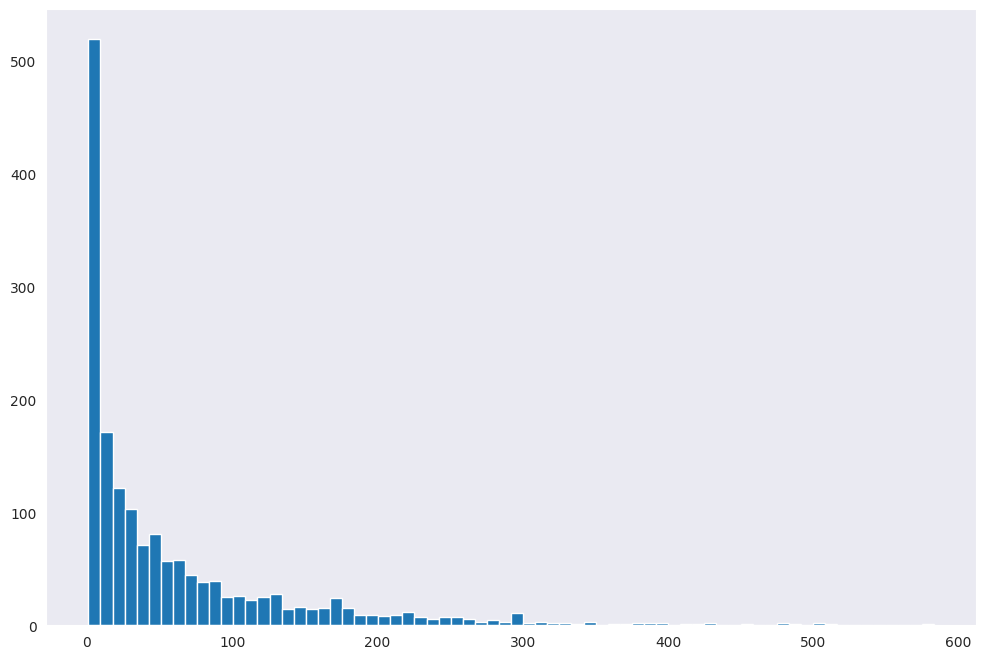

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70)
plt.show

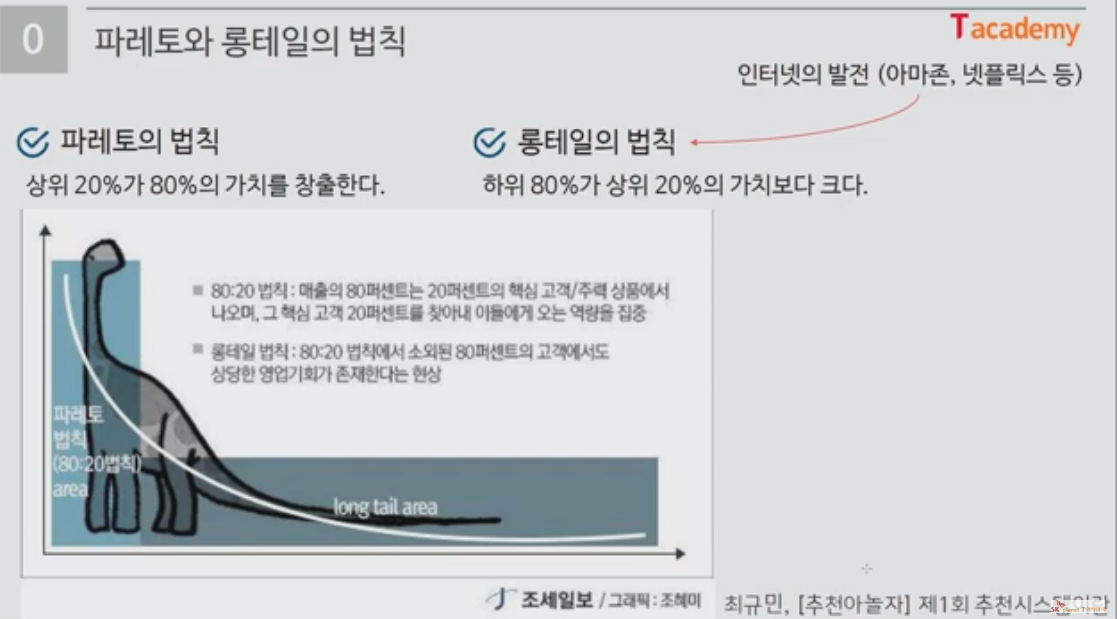

<function matplotlib.pyplot.show(close=None, block=None)>

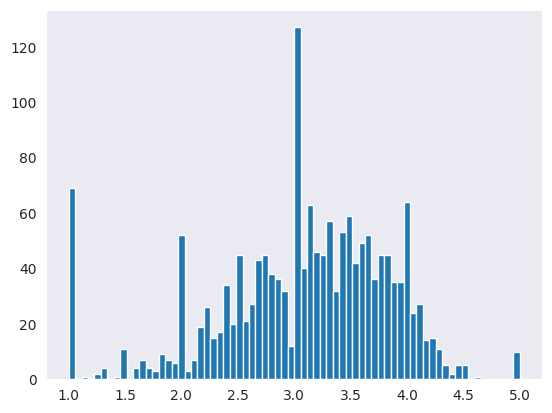

In [ ]:
plt.hist(ratings['rating'], bins=70)
plt.show

In [ ]:
ratings100 = ratings[ratings['number of ratings']>=100]
ratings100.sort_values(by='rating', ascending=False)
# 문제는 평가 최소 갯수 100개로 제한 시 데이터 338개로 갯수가 확연히 줄었음

,rating,number of ratings
movie title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
"Shawshank Redemption, The (1994)",4.445230,283
...,...,...
Spawn (1997),2.615385,143
Event Horizon (1997),2.574803,127
Crash (1996),2.546875,128


In [ ]:
#그래프에서 어림잡아 15개 선에서 설정
rating10 = ratings[ratings['number of ratings']>=15]
rating10.sort_values(by=['rating', 'number of ratings'], ascending=False)

,rating,number of ratings
movie title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67
...,...,...
Leave It to Beaver (1997),1.840909,44
Ready to Wear (Pret-A-Porter) (1994),1.833333,18
Free Willy 3: The Rescue (1997),1.740741,27


In [ ]:
# 고민해볼 사항
# - 영화 평점 횟수가 100번 -> 338개는 적지 않나..
# - 사용자 신뢰성?
# - 먼저 드롭 후에 추천, 추천 직전 드롭?

### CB

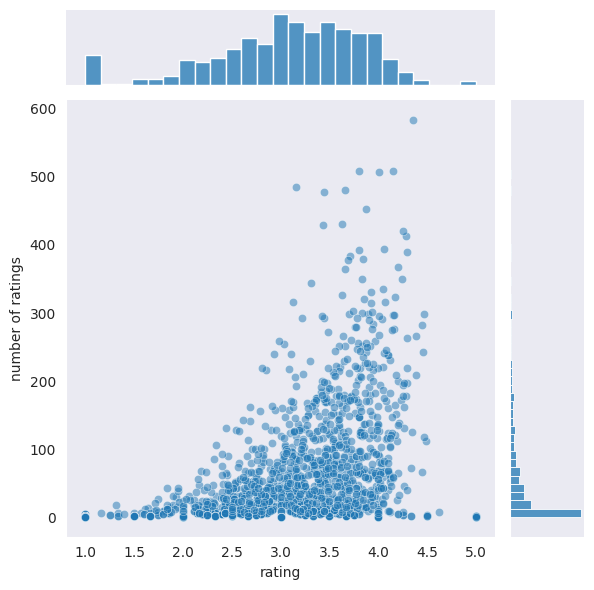

In [ ]:
sns.jointplot(x='rating', y='number of ratings', data=ratings, alpha=0.5)

In [ ]:
moviematrix = df.pivot_table(index='user id', columns='movie title', values='rating')
print(moviematrix)

movie title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user id                                                                       
1                                  NaN           NaN                    2.0   
2                                  NaN           NaN                    NaN   
3                                  NaN           NaN                    NaN   
4                                  NaN           NaN                    NaN   
5                                  NaN           NaN                    2.0   
...                                ...           ...                    ...   
939                                NaN           NaN                    NaN   
940                                NaN           NaN                    NaN   
941                                NaN           NaN                    NaN   
942                                NaN           NaN                    NaN   
943                                NaN           NaN

In [ ]:
g_vectors = movies[['unknown', 'Action', 'Adventure', 'Animation', 
              "Children's", "Comedy", 'Crime', 'Documentary', 'Drama', 'Fantasy', 
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western']]
g_vectors

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim_g_vec = pd.DataFrame(cosine_similarity(g_vectors, g_vectors))
sim_g_vec

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000
1,0.000000,1.000000,0.577350,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.00000,0.000000
2,0.000000,0.577350,1.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.00000,0.000000
3,0.333333,0.333333,0.000000,1.000000,0.333333,0.577350,0.408248,0.666667,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.000000,0.408248,0.57735,0.577350
4,0.000000,0.333333,0.577350,0.333333,1.000000,0.577350,0.408248,0.333333,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.408248,0.408248,0.00000,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.000000,0.000000,0.000000,0.577350,0.577350,1.000000,0.707107,0.577350,1.000000,0.707107,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.707107,0.00000,1.000000
1678,0.000000,0.408248,0.707107,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.00000,0.000000
1679,0.000000,0.000000,0.000000,0.408248,0.408248,0.707107,0.500000,0.408248,0.707107,0.500000,...,0.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.500000,1.000000,0.00000,0.707107
1680,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000


In [ ]:
# 인덱스는 0부터 시작, movie_id는 1부터 시작
# idx및 column 재설정
print(sim_g_vec.index)
print('='*8)
print(sim_g_vec.columns)
print('='*8)
sim_g_vec.index = sim_g_vec.index+1
sim_g_vec.columns = sim_g_vec.columns+1
sim_g_vec

RangeIndex(start=0, stop=1682, step=1)
RangeIndex(start=0, stop=1682, step=1)


,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000
2,0.000000,1.000000,0.577350,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.00000,0.000000
3,0.000000,0.577350,1.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.00000,0.000000
4,0.333333,0.333333,0.000000,1.000000,0.333333,0.577350,0.408248,0.666667,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.000000,0.408248,0.57735,0.577350
5,0.000000,0.333333,0.577350,0.333333,1.000000,0.577350,0.408248,0.333333,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.408248,0.408248,0.00000,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.000000,0.000000,0.000000,0.577350,0.577350,1.000000,0.707107,0.577350,1.000000,0.707107,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.707107,0.00000,1.000000
1679,0.000000,0.408248,0.707107,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.00000,0.000000
1680,0.000000,0.000000,0.000000,0.408248,0.408248,0.707107,0.500000,0.408248,0.707107,0.500000,...,0.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.500000,1.000000,0.00000,0.707107
1681,0.577350,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000


In [ ]:
# CB_genre_based

lst = np.argsort(sim_g_vec[1])[::-1][1:11] 
# 1번 영화와 유사한 장르의 영화 10개 뽑아 lst에 넣기
# np.argsort() 정렬한 인덱스 반환, 오름차순
# [::-1]역순출력 [시작:종료:규칙(방향)]
# [1:11]은 [0] 본인 제외한 10개

sim_g_vec[1].iloc[lst]
# 해당 lst 영화들과 0번 영화의 장르 유사도 확인

422     1.000000
95      0.866025
1219    0.866025
243     0.816497
261     0.816497
259     0.816497
63      0.816497
1032    0.816497
377     0.816497
383     0.816497
Name: 1, dtype: float64

In [ ]:
print(sim_g_vec[1])
print('='*8)
print(np.sort(sim_g_vec[1]))
print('='*8)
print(np.argsort(sim_g_vec[1]))
print('='*8)
print(sim_g_vec[1][840])
print('='*8)
print(np.argsort(sim_g_vec[1])[::-1])
print('='*8)
print(sim_g_vec[1][::-1]) 
print('='*8)
print(np.argsort(sim_g_vec[1])[::-1][1:11])

1       1.000000
2       0.000000
3       0.000000
4       0.333333
5       0.000000
          ...   
1678    0.000000
1679    0.000000
1680    0.000000
1681    0.577350
1682    0.000000
Name: 1, Length: 1682, dtype: float64
[0.        0.        0.        ... 0.8660254 1.        1.       ]
1        840
2       1018
3       1017
4       1016
5       1015
        ... 
1678     242
1679    1218
1680      94
1681     421
1682       0
Name: 1, Length: 1682, dtype: int64
0.0
1682       0
1681     421
1680      94
1679    1218
1678     242
        ... 
5       1015
4       1016
3       1017
2       1018
1        840
Name: 1, Length: 1682, dtype: int64
1682    0.000000
1681    0.577350
1680    0.000000
1679    0.000000
1678    0.000000
          ...   
5       0.000000
4       0.333333
3       0.000000
2       0.000000
1       1.000000
Name: 1, Length: 1682, dtype: float64
1681     421
1680      94
1679    1218
1678     242
1677     260
1676     258
1675      62
1674    1031
1673     376
1672 

In [ ]:
movies.iloc[lst]['movie title']

movie id
422     Aladdin and the King of Thieves (1996)
95                              Aladdin (1992)
1219                     Goofy Movie, A (1995)
243                       Jungle2Jungle (1997)
261                             Air Bud (1997)
259                George of the Jungle (1997)
63                    Santa Clause, The (1994)
1032                  Little Big League (1994)
377                        Heavyweights (1994)
383                    Flintstones, The (1994)
Name: movie title, dtype: object



---


